In [5]:
import os
game_date = '2021-01-18'
app_name = 'gamerecaps'
save_path = os.path.join(f'./{app_name}', 'static', f'{app_name}', game_date)
save_path.replace(f'./{app_name}', '')

'\\static\\gamerecaps\\2021-01-18'

In [1]:
import requests
import json
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from nba_api.stats.endpoints import shotchartdetail
%matplotlib inline

In [2]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = 1610612744,
            player_id = 201939,
            context_measure_simple = 'FGA',
            season_nullable = '2020-21',
            season_type_all_star = 'Regular Season')

In [3]:
shot_data = json.loads(shot_json.get_json())


In [5]:
shot_data['resultSets'][1]

{'name': 'LeagueAverages',
 'headers': ['GRID_TYPE',
  'SHOT_ZONE_BASIC',
  'SHOT_ZONE_AREA',
  'SHOT_ZONE_RANGE',
  'FGA',
  'FGM',
  'FG_PCT'],
 'rowSet': [['League Averages',
   'Above the Break 3',
   'Back Court(BC)',
   'Back Court Shot',
   8,
   0,
   0.0],
  ['League Averages',
   'Above the Break 3',
   'Center(C)',
   '24+ ft.',
   2542,
   884,
   0.348],
  ['League Averages',
   'Above the Break 3',
   'Left Side Center(LC)',
   '24+ ft.',
   3579,
   1321,
   0.369],
  ['League Averages',
   'Above the Break 3',
   'Right Side Center(RC)',
   '24+ ft.',
   3361,
   1195,
   0.356],
  ['League Averages',
   'Backcourt',
   'Back Court(BC)',
   'Back Court Shot',
   50,
   1,
   0.02],
  ['League Averages',
   'In The Paint (Non-RA)',
   'Center(C)',
   '8-16 ft.',
   1712,
   762,
   0.445],
  ['League Averages',
   'In The Paint (Non-RA)',
   'Center(C)',
   'Less Than 8 ft.',
   3025,
   1224,
   0.405],
  ['League Averages',
   'In The Paint (Non-RA)',
   'Left Side(L)'

In [6]:
shot_data = json.loads(shot_json.get_json())
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']

In [7]:
curry_data = pd.DataFrame(rows)
curry_data.columns = headers
curry_data

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022000001,21,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,16,...,Left Side Center(LC),24+ ft.,26,-120,240,1,0,20201222,BKN,GSW
1,Shot Chart Detail,0022000001,29,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,38,...,Center(C),Less Than 8 ft.,3,29,26,1,1,20201222,BKN,GSW
2,Shot Chart Detail,0022000001,81,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,15,...,Left Side Center(LC),24+ ft.,24,-90,231,1,0,20201222,BKN,GSW
3,Shot Chart Detail,0022000001,97,201939,Stephen Curry,1610612744,Golden State Warriors,1,4,52,...,Right Side Center(RC),16-24 ft.,22,72,215,1,1,20201222,BKN,GSW
4,Shot Chart Detail,0022000001,152,201939,Stephen Curry,1610612744,Golden State Warriors,1,1,37,...,Center(C),Less Than 8 ft.,2,1,26,1,0,20201222,BKN,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Shot Chart Detail,0022000101,464,201939,Stephen Curry,1610612744,Golden State Warriors,3,5,7,...,Left Side(L),24+ ft.,23,-232,-2,1,0,20210104,GSW,SAC
145,Shot Chart Detail,0022000101,472,201939,Stephen Curry,1610612744,Golden State Warriors,3,4,31,...,Center(C),Less Than 8 ft.,2,-11,17,1,1,20210104,GSW,SAC
146,Shot Chart Detail,0022000101,484,201939,Stephen Curry,1610612744,Golden State Warriors,3,3,49,...,Left Side Center(LC),16-24 ft.,22,-118,188,1,0,20210104,GSW,SAC
147,Shot Chart Detail,0022000101,518,201939,Stephen Curry,1610612744,Golden State Warriors,3,1,58,...,Left Side Center(LC),24+ ft.,24,-144,203,1,0,20210104,GSW,SAC


In [8]:
curry_data['SHOT_ZONE_BASIC'].value_counts()

Above the Break 3        74
Restricted Area          28
Mid-Range                22
In The Paint (Non-RA)    15
Left Corner 3             4
Right Corner 3            3
Backcourt                 3
Name: SHOT_ZONE_BASIC, dtype: int64

In [9]:
curry_data['SHOT_ZONE_AREA'].value_counts()

Center(C)                58
Left Side Center(LC)     40
Right Side Center(RC)    38
Left Side(L)              5
Right Side(R)             5
Back Court(BC)            3
Name: SHOT_ZONE_AREA, dtype: int64

In [10]:
curry_data['SHOT_ZONE_RANGE'].value_counts()

24+ ft.            81
Less Than 8 ft.    35
16-24 ft.          21
8-16 ft.            9
Back Court Shot     3
Name: SHOT_ZONE_RANGE, dtype: int64

In [230]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='slategrey', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

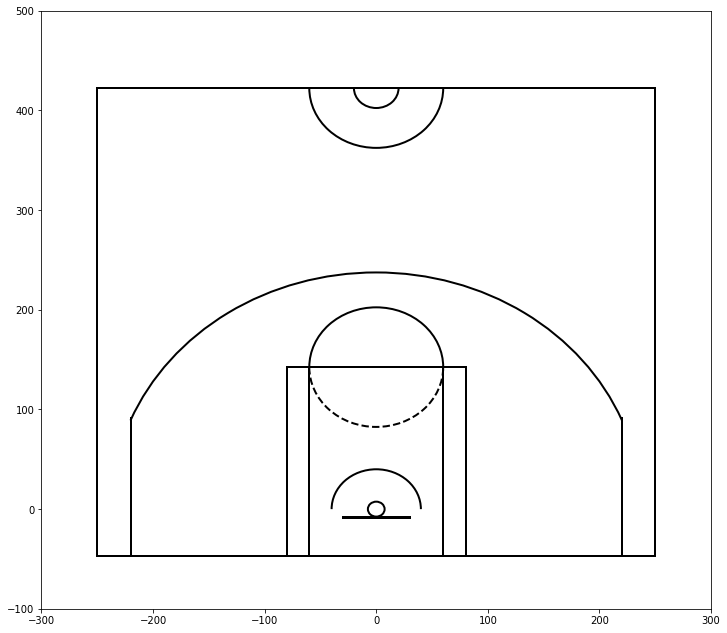

In [12]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

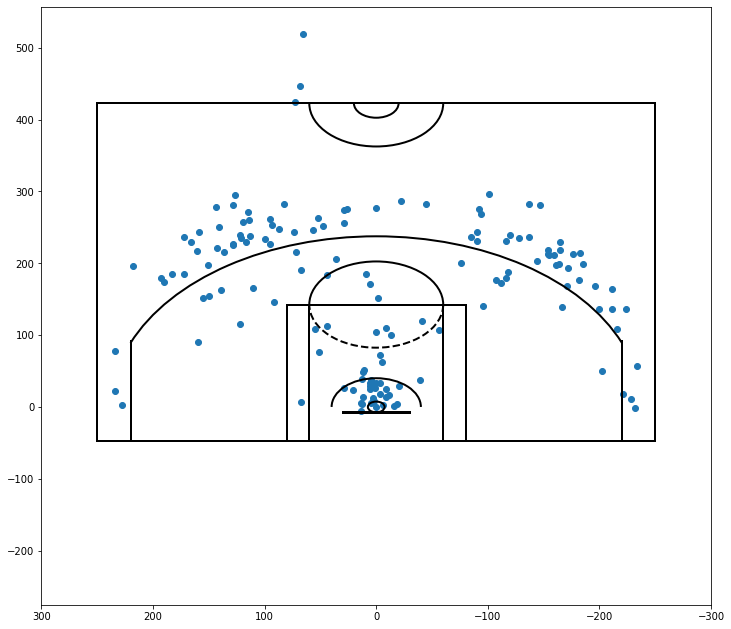

In [13]:
plt.figure(figsize=(12,11))
plt.scatter(curry_data['LOC_X'], curry_data['LOC_Y'])
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

In [14]:
makes = curry_data[curry_data['SHOT_MADE_FLAG']==1]
misses = curry_data[curry_data['SHOT_MADE_FLAG']==0]

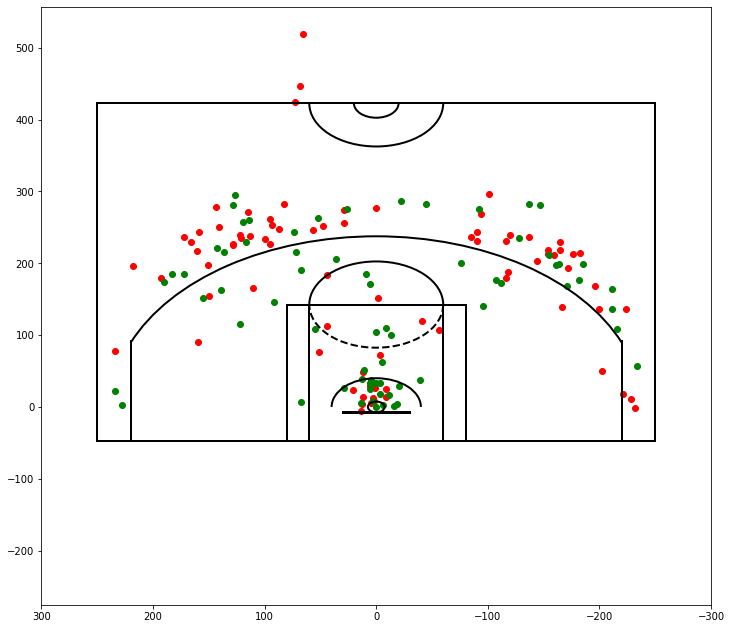

In [15]:
plt.figure(figsize=(12,11))
plt.scatter(misses['LOC_X'], misses['LOC_Y'],color=[255,0,0,.5])
plt.scatter(makes['LOC_X'], makes['LOC_Y'],color=[0,128,0,.5])
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

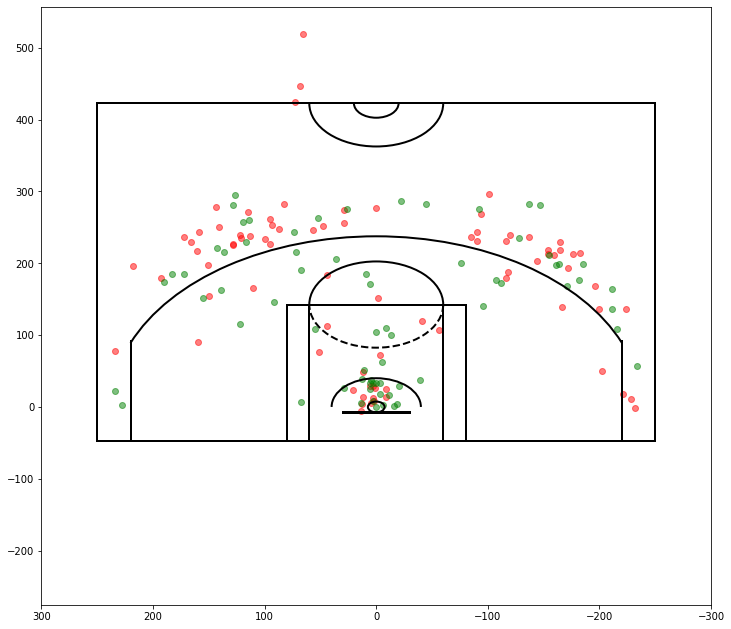

In [35]:
plt.figure(figsize=(12,11))
alpha = 0.5
plt.scatter(misses['LOC_X'], misses['LOC_Y'],color='red', alpha=alpha)
plt.scatter(makes['LOC_X'], makes['LOC_Y'],color='green', alpha=alpha)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

In [16]:
#### Create buckets
df = curry_data

df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [17]:
df[['EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE','LOC_X', 'LOC_Y']]

,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y
0,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-120,240
1,Made Shot,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,29,26
2,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-90,231
3,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,22,72,215
4,Missed Shot,Driving Floating Bank Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,1,26
...,...,...,...,...,...,...,...,...,...
144,Missed Shot,Step Back Jump shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-232,-2
145,Made Shot,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-11,17
146,Missed Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,22,-118,188
147,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-144,203


In [18]:
corner_data = df[df['LOC_X']<=-220]
corner_data[['EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE','LOC_X', 'LOC_Y']]

,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y
26,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,24,-234,57
28,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-224,136
40,Missed Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,22,-221,18
52,Missed Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,22,-228,11
144,Missed Shot,Step Back Jump shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-232,-2


In [19]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = 1610612744,
            context_measure_simple = 'FGA',
            season_nullable = '2020-21',
            season_type_all_star = 'Regular Season')
#NOTE: will haver to loop through all playters from a game, get their data, concat to df to get team chart

TypeError: __init__() missing 1 required positional argument: 'player_id'

In [ ]:
df['SHOT_ZONE_BASIC'].value_counts()


In [ ]:
makes = df[df['SHOT_MADE_FLAG']==1]
misses = df[df['SHOT_MADE_FLAG']==0]

In [ ]:
makes['SHOT_ZONE_BASIC'].value_counts()

In [ ]:
misses['SHOT_ZONE_BASIC'].value_counts()

In [ ]:
fig = plt.figure(figsize=(12,11))
ax = draw_court(outer_lines=True)

ax.annotate("test",
            xy=(220, 10), xycoords='data',
            xytext=(220, 10), textcoords='data',
            )
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [ ]:
shot_data = {}
makes_dict =dict(makes['SHOT_ZONE_BASIC'].value_counts())
misses_dict = dict(misses['SHOT_ZONE_BASIC'].value_counts())

for key, value in makes_dict.items():
        shot_data[key] = {'makes':value,
                         'misses':0}
    
for key, value in misses_dict.items():
    if key in shot_data.keys():
        shot_data[key]['misses'] = value
    else:
        shot_data[key] = {'makes':0,
                         'misses':value}
    
shot_data

In [ ]:
fig = plt.figure(figsize=(12,11))
ax = draw_court(outer_lines=True)
plt.scatter(misses['LOC_X'], misses['LOC_Y'],color='red')
plt.scatter(makes['LOC_X'], makes['LOC_Y'],color='green')
ax.annotate(f"{shot_data['Above the Break 3']['makes']}/{shot_data['Above the Break 3']['misses']+shot_data['Above the Break 3']['makes']}",
            xy=(-10, 250), xycoords='data',
            xytext=(-10, 250), textcoords='data',
            )
ax.annotate(f"{shot_data['Mid-Range']['makes']}/{shot_data['Mid-Range']['misses']+shot_data['Mid-Range']['makes']}",
            xy=(-10, 165), xycoords='data',
            xytext=(-10, 165), textcoords='data',
            )      
ax.annotate(f"{shot_data['Restricted Area']['makes']}/{shot_data['Restricted Area']['misses']+shot_data['Restricted Area']['makes']}",
            xy=(-10, 15), xycoords='data',
            xytext=(-10, 15), textcoords='data',
            ) 
ax.annotate(f"{shot_data['In The Paint (Non-RA)']['makes']}/{shot_data['In The Paint (Non-RA)']['misses']+shot_data['In The Paint (Non-RA)']['makes']}",
            xy=(-10, 100), xycoords='data',
            xytext=(-10, 100), textcoords='data',
            )
            
ax.annotate(f"{shot_data['Left Corner 3']['makes']}/{shot_data['Left Corner 3']['misses']+shot_data['Left Corner 3']['makes']}",
            xy=(-240, 50), xycoords='data',
            xytext=(-240, 50), textcoords='data',
            )
ax.annotate(f"{shot_data['Right Corner 3']['makes']}/{shot_data['Right Corner 3']['misses']+shot_data['Right Corner 3']['makes']}",
            xy=(225, 50), xycoords='data',
            xytext=(225, 50), textcoords='data',
            )       
ax.annotate(f"{shot_data['Backcourt']['makes']}/{shot_data['Backcourt']['misses']+shot_data['Backcourt']['makes']}",
            xy=(-10, 430), xycoords='data',
            xytext=(-10, 430), textcoords='data',
            )       


plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [7]:
games_page = requests.get('https://api.pbpstats.com/get-games/nba?Season=2020-21&SeasonType=Regular%2BSeason')
games_data = games_page.json()

In [8]:
games_df = pd.DataFrame(games_data['results'])
games_df = games_df.sort_values('Date',ascending=False)
recent_date = games_df['Date'].max()
recent_date

'2021-01-15'

In [9]:
recent_games_df = games_df[games_df['Date']==recent_date]
recent_games_df


,AwayPoints,AwayPossessions,AwayTeamAbbreviation,AwayTeamId,Date,GameId,HomePoints,HomePossessions,HomeTeamAbbreviation,HomeTeamId
176,138,96.0,LAC,1610612746,2021-01-15,0022000188,100,97.0,SAC,1610612758
175,95,96.0,NOP,1610612740,2021-01-15,0022000187,112,95.0,LAL,1610612747
174,92,103.0,ATL,1610612737,2021-01-15,0022000186,116,101.0,UTA,1610612762
173,125,115.0,CHI,1610612741,2021-01-15,0022000184,127,115.0,OKC,1610612760
172,109,97.0,DAL,1610612742,2021-01-15,0022000182,112,98.0,MIL,1610612749
171,103,94.0,NYK,1610612752,2021-01-15,0022000181,106,93.0,CLE,1610612739
170,97,98.0,ORL,1610612753,2021-01-15,0022000180,124,97.0,BOS,1610612738


In [247]:
#get league averages and plot
recent_game_ids = list(recent_games_df['GameId'])

for game_id in recent_game_ids:
    game = requests.get(f'https://api.pbpstats.com/get-game-stats?Type=Player&GameId={game_id}')
    game_data = game.json()
    away_team_id = game_data['away_team_id']
    home_team_id = game_data['home_team_id']
    
    away_df = pd.DataFrame(game_data['stats']['Away']['FullGame'])
    home_df = pd.DataFrame(game_data['stats']['Home']['FullGame'])
    
    away_shots_df = None
    away_shot_dfs = []
    
    shot_json = shotchartdetail.ShotChartDetail(
        team_id = away_team_id,
        player_id = 0,
        game_id_nullable =game_id,
        context_measure_simple = 'FGA',
        season_nullable = '2020-21',
        season_type_all_star = 'Regular Season')
    shot_data = json.loads(shot_json.get_json())
    relevant_data = shot_data['resultSets'][0]
    headers = relevant_data['headers']
    rows = relevant_data['rowSet']
    
    la_relevant_data = shot_data['resultSets'][1]
    la_headers = la_relevant_data['headers']
    la_rows = la_relevant_data['rowSet']
            
            
            
    away_shots_df = pd.DataFrame(rows)
    away_shots_df.columns = headers
    
    league_average_df = pd.DataFrame(la_rows)
    league_average_df.columns = la_headers
                
    
    shot_json = shotchartdetail.ShotChartDetail(
        team_id = home_team_id,
        player_id = 0,
        game_id_nullable =game_id,
        context_measure_simple = 'FGA',
        season_nullable = '2020-21',
        season_type_all_star = 'Regular Season')
    shot_data = json.loads(shot_json.get_json())
    relevant_data = shot_data['resultSets'][0]
    headers = relevant_data['headers']
    rows = relevant_data['rowSet']
    
    home_shots_df = pd.DataFrame(rows)
    home_shots_df.columns = headers
    
    
    
    break
    

In [249]:
home_shots_df.groupby('SHOT_ZONE_BASIC').agg({'SHOT_ATTEMPTED_FLAG':'sum', 'SHOT_MADE_FLAG':'sum'})

,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
SHOT_ZONE_BASIC,,
Above the Break 3,23,7
Backcourt,1,0
In The Paint (Non-RA),26,13
Left Corner 3,1,1
Mid-Range,12,5
Restricted Area,21,14
Right Corner 3,1,0


In [93]:
league_average_zones_df = league_average_df.groupby('SHOT_ZONE_BASIC').agg({'FGM':'sum','FGA':'sum'})
league_average_zones_df['fg%'] =  ((league_average_zones_df['FGM'] / league_average_zones_df['FGA'])*100).round(2).astype(str)+'%'
league_average_zones_df['freq%'] =  ((league_average_zones_df['FGA'] / league_average_zones_df['FGA'].sum())*100).round(2).astype(str)+'%'
#league_average_zones_df['fg%'] = league_average_zones_df['fg%'].round(2)
#league_average_zones_df['freq%'] = league_average_zones_df['freq%'].round(2)
league_average_zones_df
#league_average_zones_df['fg%'] = league_average_zones_df['fg%'].astype(str)
#league_average_zones_df['fg%'].str.format()
#league_average_zones_df = league_average_zones_df.style.format({'fg%': '{:.2%}','freq%': '{.2%}' })

,FGM,FGA,fg%,freq%
SHOT_ZONE_BASIC,,,,
Above the Break 3,3400,9490,35.83%,30.06%
Backcourt,1,50,2.0%,0.16%
In The Paint (Non-RA),2242,5357,41.85%,16.97%
Left Corner 3,630,1537,40.99%,4.87%
Mid-Range,1749,4192,41.72%,13.28%
Restricted Area,5978,9520,62.79%,30.16%
Right Corner 3,549,1420,38.66%,4.5%


In [88]:
league_average_zones_df.to_dict()

AttributeError: 'Styler' object has no attribute 'to_dict'

In [56]:
pd.set_option('display.max_rows', 500)
away_shots_df = away_shots_df.drop_duplicates()
away_shots_df['PLAYER_NAME'].value_counts()

Kawhi Leonard        26
Paul George          18
Patrick Beverley      9
Lou Williams          9
Serge Ibaka           7
Luke Kennard          6
Patrick Patterson     5
Ivica Zubac           5
Nicolas Batum         4
Reggie Jackson        3
Terance Mann          1
Name: PLAYER_NAME, dtype: int64

In [57]:
pd.set_option('display.max_columns', 500)
away_shots_df[away_shots_df['PLAYER_NAME']=='Julius Randle'].sort_values('GAME_EVENT_ID')

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM


In [58]:
makes = away_shots_df[away_shots_df['SHOT_MADE_FLAG']==1]
misses = away_shots_df[away_shots_df['SHOT_MADE_FLAG']==0]
shot_data = {}
makes_dict =dict(makes['SHOT_ZONE_BASIC'].value_counts())
misses_dict = dict(misses['SHOT_ZONE_BASIC'].value_counts())

for key, value in makes_dict.items():
        shot_data[key] = {'makes':value,
                         'misses':0}
    
for key, value in misses_dict.items():
    if key in shot_data.keys():
        shot_data[key]['misses'] = value
    else:
        shot_data[key] = {'makes':0,
                         'misses':value}
    
shot_data

{'Restricted Area': {'makes': 14, 'misses': 9},
 'In The Paint (Non-RA)': {'makes': 11, 'misses': 9},
 'Above the Break 3': {'makes': 11, 'misses': 17},
 'Mid-Range': {'makes': 5, 'misses': 5},
 'Left Corner 3': {'makes': 3, 'misses': 6},
 'Right Corner 3': {'makes': 0, 'misses': 3}}

KeyError: 'Backcourt'

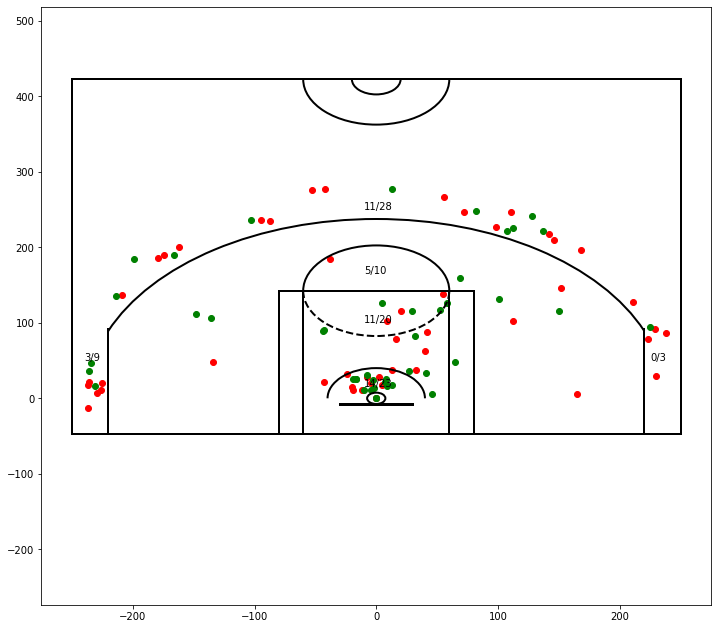

In [59]:
fig = plt.figure(figsize=(12,11))
ax = draw_court(outer_lines=True)
plt.scatter(misses['LOC_X'], misses['LOC_Y'],color='red')
plt.scatter(makes['LOC_X'], makes['LOC_Y'],color='green')
ax.annotate(f"{shot_data['Above the Break 3']['makes']}/{shot_data['Above the Break 3']['misses']+shot_data['Above the Break 3']['makes']}",
            xy=(-10, 250), xycoords='data',
            xytext=(-10, 250), textcoords='data',
            )
ax.annotate(f"{shot_data['Mid-Range']['makes']}/{shot_data['Mid-Range']['misses']+shot_data['Mid-Range']['makes']}",
            xy=(-10, 165), xycoords='data',
            xytext=(-10, 165), textcoords='data',
            )      
ax.annotate(f"{shot_data['Restricted Area']['makes']}/{shot_data['Restricted Area']['misses']+shot_data['Restricted Area']['makes']}",
            xy=(-10, 15), xycoords='data',
            xytext=(-10, 15), textcoords='data',
            ) 
ax.annotate(f"{shot_data['In The Paint (Non-RA)']['makes']}/{shot_data['In The Paint (Non-RA)']['misses']+shot_data['In The Paint (Non-RA)']['makes']}",
            xy=(-10, 100), xycoords='data',
            xytext=(-10, 100), textcoords='data',
            )
            
ax.annotate(f"{shot_data['Left Corner 3']['makes']}/{shot_data['Left Corner 3']['misses']+shot_data['Left Corner 3']['makes']}",
            xy=(-240, 50), xycoords='data',
            xytext=(-240, 50), textcoords='data',
            )
ax.annotate(f"{shot_data['Right Corner 3']['makes']}/{shot_data['Right Corner 3']['misses']+shot_data['Right Corner 3']['makes']}",
            xy=(225, 50), xycoords='data',
            xytext=(225, 50), textcoords='data',
            )       
ax.annotate(f"{shot_data['Backcourt']['makes']}/{shot_data['Backcourt']['misses']+shot_data['Backcourt']['makes']}",
            xy=(-10, 430), xycoords='data',
            xytext=(-10, 430), textcoords='data',
            )       

ax.add_patch(Rectangle((-25 , 0), 50, 50,
                      alpha=.75, color='gray'))
ax.add_patch(Rectangle((-25 , 75), 50, 50,
                      alpha=.75, color='gray'))
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [65]:
import boxscoreutils


In [133]:
away_shots_df.shape[0]


93

In [135]:
def parse_shot_data(df, la_df):
    '''converts shot dataframe in dict of makes and misses by zone'''
    total_shots = df.shape[0]
    makes_df = df[df['SHOT_MADE_FLAG'] == 1]
    misses_df = df[df['SHOT_MADE_FLAG'] == 0]
    shot_data = {}
    makes_dict = dict(makes_df['SHOT_ZONE_BASIC'].value_counts())
    misses_dict = dict(misses_df['SHOT_ZONE_BASIC'].value_counts())
    # add league average data
    la_dict = la_df.to_dict()
    for key, value in la_dict['fg%'].items():
        shot_data[key] = {}
        shot_data[key]['la_average'] = value

    for key, value in la_dict['freq%'].items():
        shot_data[key]['la_freq'] = value

    for key, value in makes_dict.items():
        shot_data[key]['makes'] = value

    for key, value in misses_dict.items():
        shot_data[key]['misses'] = value
    
    shot_data['total_shots'] = total_shots

    return shot_data, makes_df, misses_df

In [236]:
def plot_shot_chart(df, la_df, chart_title, file_name):
    shot_data, makes_df, misses_df = parse_shot_data(df, la_df)
    fig = plt.figure(figsize=(12, 11))
    ax = draw_court(outer_lines=True)
    plt.scatter(misses_df['LOC_X'], misses_df['LOC_Y'], color='red', alpha=0.5)
    plt.scatter(makes_df['LOC_X'], makes_df['LOC_Y'], color='green', alpha=0.5)

    possible_zones = [{'name': 'Above the Break 3',
                       'box_coordinates': (0, 280),
                       },
                      {'name': 'Mid-Range',                      
                       'box_coordinates': (0, 180),
                       },
                      {'name': 'Restricted Area',
                       'box_coordinates': (0, -50),
                       },
                      {'name': 'In The Paint (Non-RA)',
                       'box_coordinates': (0, 100),
                       },
                      {'name': 'Left Corner 3',
                       'box_coordinates': (-255, -50),                       
                       },
                      {'name': 'Right Corner 3',                       
                       'box_coordinates': (240, -50),
                       },
                      {'name': 'Backcourt',
                       'box_coordinates': (0, 460),
                       }
                      ]
    for zone in possible_zones:
        try:
            zone_data = shot_data[zone['name']]
            zone_raw = f"{zone_data['makes']}/{zone_data['misses'] + zone_data['makes']}"
            zone_pct = f"FG%: {round((zone_data['makes'] / (zone_data['misses'] + zone_data['makes']))*100,2)}%"
            zone_freq = f"freq%: {round(((zone_data['misses'] + zone_data['makes'])/ shot_data['total_shots'])*100,2)}%"
        except:
            zone_raw = "0/0"
            zone_pct = "FG%: 0%" 
            zone_freq = "freq%: 0%"
            
        text = f"{zone_raw}\n{zone_pct}\n{zone_freq}\n\nLA FG%: {zone_data['la_average']}\nLA freq: {zone_data['la_freq']}"
        
        ax.text(zone['box_coordinates'][0],zone['box_coordinates'][1],text,
                color ='black',
                weight='bold',
                bbox={'facecolor':'whitesmoke','alpha':.7,'edgecolor':'black','pad':1},
                ha='center', 
                va='center')

    plt.xlim(-300, 300)
    plt.ylim(-100, 500)
    plt.title(chart_title, loc='left')
    plt.show()
    #fig.savefig(file_name)

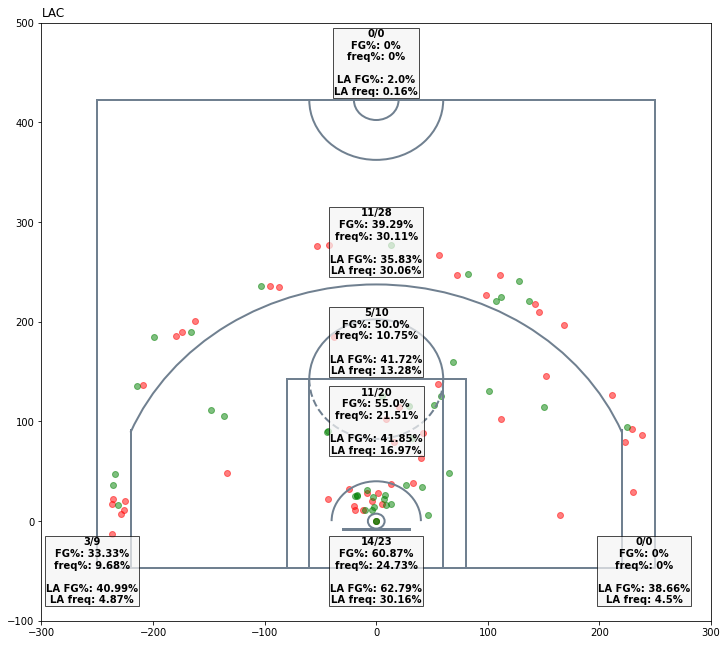

In [237]:
plot_shot_chart(away_shots_df, league_average_zones_df, 'LAC', 'testshotchartLAC.png')

In [242]:
import os
from datetime import datetime
import boxscoreutils
#datetime.today().strftime('')
recent_games_df = boxscoreutils.get_games()
game_date = list(recent_games_df['Date'])[0]
game_date

'2021-01-15'

In [244]:
shot_json = shotchartdetail.ShotChartDetail(
        team_id=0,
        player_id=0,
        context_measure_simple='FGA',
        season_nullable='2020-21',
        season_type_all_star='Regular Season')
shot_data = json.loads(shot_json.get_json())
la_relevant_data = shot_data['resultSets'][1]
la_headers = la_relevant_data['headers']
la_rows = la_relevant_data['rowSet']

league_average_df = pd.DataFrame(la_rows)
league_average_df.columns = la_headers

league_average_zones_df = league_average_df.groupby('SHOT_ZONE_BASIC').agg({'FGM':'sum','FGA':'sum'})
league_average_zones_df['fg%'] =  ((league_average_zones_df['FGM'] / league_average_zones_df['FGA'])*100).round(2).astype(str)+'%'
league_average_zones_df['freq%'] =  ((league_average_zones_df['FGA'] / league_average_zones_df['FGA'].sum())*100).round(2).astype(str)+'%'


,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,8,0,0.000
1,League Averages,Above the Break 3,Center(C),24+ ft.,2608,909,0.349
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,3672,1364,0.371
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,3451,1225,0.355
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,52,1,0.019
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,1756,786,0.448
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,3097,1249,0.403
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,325,132,0.406
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,316,138,0.437
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,1586,646,0.407


In [3]:
import requests
import json
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from nba_api.stats.endpoints import shotchartdetail
from matplotlib.patches import Circle, Rectangle, Arc
import boxscoreutils
import buildrotation
import jinja2
import time
import os
from datetime import datetime

recent_games_df = boxscoreutils.get_games()
game_date = list(recent_games_df['Date'])[0]
recent_game_ids = list(recent_games_df['GameId'])

games_dicts = []

la_df = boxscoreutils.get_league_average_shot_data()

for game_id in recent_game_ids:
    print(game_id)
    game = requests.get(f'https://api.pbpstats.com/get-game-stats?Type=Player&GameId={game_id}')
    game_data = game.json()
    away_team_id = game_data['away_team_id']
    home_team_id = game_data['home_team_id']

    away_df = pd.DataFrame(game_data['stats']['Away']['FullGame'])
    home_df = pd.DataFrame(game_data['stats']['Home']['FullGame'])

    if not os.path.exists(game_date):
        os.makedirs(game_date)

    # create shot charts
    away_shots_df = boxscoreutils.get_team_shot_data(away_df, away_team_id, game_id)
    home_shots_df = boxscoreutils.get_team_shot_data(home_df, home_team_id, game_id)

#     away_shots_save_path = os.path.join(game_date, f"{game_data['away_team_abbreviation']}shots.png")
#     home_shots_save_path = os.path.join(game_date, f"{game_data['home_team_abbreviation']}shots.png")

#     boxscoreutils.plot_shot_chart(away_shots_df, la_df, game_data['away_team_abbreviation'],
#                                   away_shots_save_path)
#     boxscoreutils.plot_shot_chart(home_shots_df, la_df, game_data['home_team_abbreviation'],
#                                   home_shots_save_path)
    
    break

0022000188


In [4]:
home_shots_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022000188,7,203084,Harrison Barnes,1610612758,Sacramento Kings,1,11,39,...,Center(C),Less Than 8 ft.,0,0,6,1,1,20210115,SAC,LAC
1,Shot Chart Detail,0022000188,13,1627741,Buddy Hield,1610612758,Sacramento Kings,1,10,58,...,Center(C),24+ ft.,28,57,278,1,1,20210115,SAC,LAC
2,Shot Chart Detail,0022000188,15,1626158,Richaun Holmes,1610612758,Sacramento Kings,1,10,25,...,Center(C),8-16 ft.,11,24,116,1,1,20210115,SAC,LAC
3,Shot Chart Detail,0022000188,19,1628368,De'Aaron Fox,1610612758,Sacramento Kings,1,10,5,...,Center(C),24+ ft.,24,-44,242,1,0,20210115,SAC,LAC
4,Shot Chart Detail,0022000188,22,1628963,Marvin Bagley III,1610612758,Sacramento Kings,1,9,53,...,Center(C),24+ ft.,24,-49,243,1,1,20210115,SAC,LAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Shot Chart Detail,0022000188,582,1629002,Chimezie Metu,1610612758,Sacramento Kings,4,2,40,...,Center(C),24+ ft.,25,-52,252,1,0,20210115,SAC,LAC
81,Shot Chart Detail,0022000188,587,1629713,Justin James,1610612758,Sacramento Kings,4,2,6,...,Center(C),Less Than 8 ft.,7,-71,31,1,0,20210115,SAC,LAC
82,Shot Chart Detail,0022000188,593,1628963,Marvin Bagley III,1610612758,Sacramento Kings,4,1,37,...,Right Side Center(RC),24+ ft.,25,163,201,1,1,20210115,SAC,LAC
83,Shot Chart Detail,0022000188,595,1630218,Robert Woodard II,1610612758,Sacramento Kings,4,1,8,...,Center(C),Less Than 8 ft.,2,-12,22,1,1,20210115,SAC,LAC


In [5]:
home_shots_df.groupby('SHOT_ZONE_BASIC').agg({'SHOT_ATTEMPTED_FLAG':'sum', 'SHOT_MADE_FLAG':'sum'})

,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
SHOT_ZONE_BASIC,,
Above the Break 3,23,7
Backcourt,1,0
In The Paint (Non-RA),26,13
Left Corner 3,1,1
Mid-Range,12,5
Restricted Area,21,14
Right Corner 3,1,0


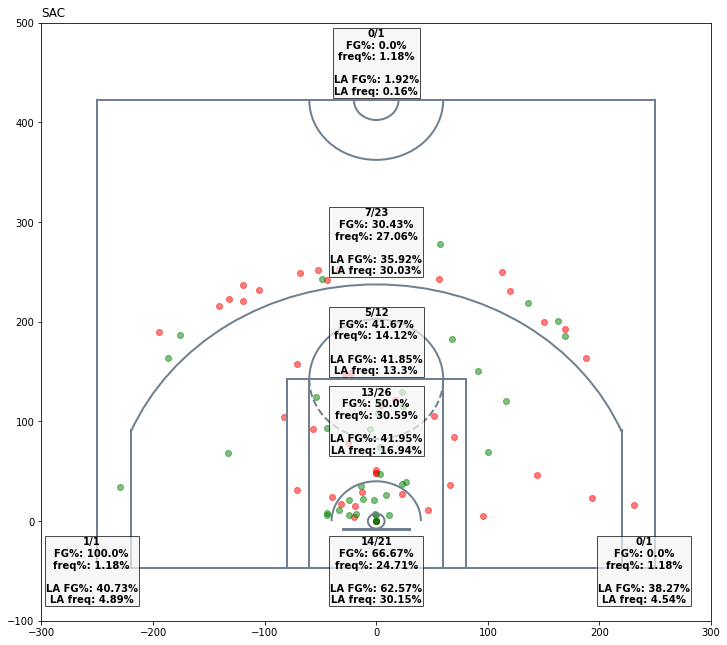

In [6]:
import boxscoreutils
boxscoreutils.plot_shot_chart(home_shots_df, la_df, game_data['home_team_abbreviation'],
                                   'testsacchar.png')

In [7]:
boxscoreutils.parse_shot_data(home_shots_df, la_df)

({'Above the Break 3': {'la_average': '35.92%',
   'la_freq': '30.03%',
   'makes': 7,
   'misses': 16},
  'Backcourt': {'la_average': '1.92%', 'la_freq': '0.16%', 'misses': 1},
  'In The Paint (Non-RA)': {'la_average': '41.95%',
   'la_freq': '16.94%',
   'makes': 13,
   'misses': 13},
  'Left Corner 3': {'la_average': '40.73%', 'la_freq': '4.89%', 'makes': 1},
  'Mid-Range': {'la_average': '41.85%',
   'la_freq': '13.3%',
   'makes': 5,
   'misses': 7},
  'Restricted Area': {'la_average': '62.57%',
   'la_freq': '30.15%',
   'makes': 14,
   'misses': 7},
  'Right Corner 3': {'la_average': '38.27%', 'la_freq': '4.54%', 'misses': 1},
  'total_shots': 85},
             GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  \
 0   Shot Chart Detail  0022000188              7     203084   
 1   Shot Chart Detail  0022000188             13    1627741   
 2   Shot Chart Detail  0022000188             15    1626158   
 4   Shot Chart Detail  0022000188             22    1628963   
 5   Shot Chart 